In [1]:
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/edenLee94/analytics/main/iris_dataset/IRIS.csv')

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [4]:
iris['id'] = range(len(iris))

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,id
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4.6,3.1,1.5,0.2,Iris-setosa,3
4,5.0,3.6,1.4,0.2,Iris-setosa,4


In [6]:
# 순서를 바꿔주는게 더 좋을 것 같다.
iris = iris[['id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']]

In [7]:
iris.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


### KNN 학습을 위해서 train & test를 나눠준다!

In [8]:
iris_train = iris.sample(100,replace=False, random_state=2000).reset_index().drop(['index'],axis=1)

In [9]:
iris_train.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,19,5.1,3.8,1.5,0.3,Iris-setosa
1,84,5.4,3.0,4.5,1.5,Iris-versicolor
2,27,5.2,3.5,1.5,0.2,Iris-setosa
3,94,5.6,2.7,4.2,1.3,Iris-versicolor
4,128,6.4,2.8,5.6,2.1,Iris-virginica


참, 거짓값을 바꿔주는 것이다. 역접? 표현이 애매하지만, 참->거짓/거짓->참 이렇게 바꿔준다.
~iris['id'].isin(iris_train['id']

In [10]:
iris_test = iris.loc[~iris['id'].isin(iris_train['id']) ].reset_index().drop(['index'],axis=1)

In [11]:
# train: test = 2:1(100:50)
len(iris_test)

50

의사 결정 나무로 진행!

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(min_samples_split=10)
# 의사결정나무에서 각 구간의 최소 샘플 수, 10보다 작으면 더 이상 분리되지 않는다.

In [14]:
iris_train.columns

Index(['id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [15]:
dt.fit(iris_train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], iris_train['species'])

DecisionTreeClassifier(min_samples_split=10)

In [17]:
predictions = dt.predict(iris_test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [19]:
iris_test['pred'] = predictions

In [21]:
(iris_test['pred']==iris_test['species']).mean()

0.98

모델 시각화 가능하니까 시각화 과정을 해보자.

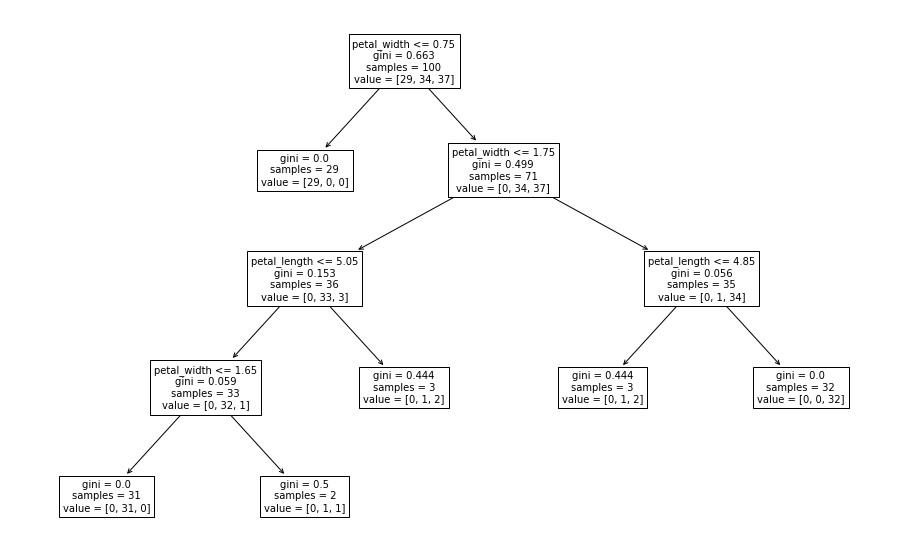

In [27]:
from sklearn import tree
import matplotlib.pyplot as plt
# 그림의 크기를 키우고자 설정
from matplotlib import rcParams
rcParams['figure.figsize']=16,10

a = tree.plot_tree(dt, 
                   feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                   fontsize=10)
                   # ,max_depth=2 하위 트리를 안보이게 설정해줄수 있다.
plt.show(a)

## Model의 성능 측정하기

In [28]:
from sklearn.model_selection import cross_val_score
import numpy as np

dt = DecisionTreeClassifier(min_samples_split=10)

In [37]:
# 5th fold Cross Validation -> 3번으로 나눠서 진행했으니까 배열에 3개의 값을 가지는게 당연하다.
cross_val_score(dt, iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], iris['species'],cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [36]:
np.mean(cross_val_score(dt, iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], iris['species'],cv=5))

0.9666666666666668